<a href="https://colab.research.google.com/github/mllnxzz/Provas/blob/main/atividade_pr_tica_individual_ra2_b_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Atenção: Regras para a solução da atividade.** 
1. Para participar desta avaliação o aluno precisa estar presente em sala, alunos que não respoderem a chamada terão a avaliação zerada.
2. copie este caderno para a sua conta, criando as células de texto e código que forem necessárias após o enunciado de cada questão;
3. não apague os enunciados; 
4. responda as questões na ordem em que elas se apresentam neste caderno;
5. pode, e deve, consultar todo e qualquer recurso disponível na internet. Mas, não pode consultar nenhum outro ser humano. 
6. Poste no AVA (Canvas) o link para a sua resposta. Pode ser um link para a solução no Google Colab, ou um link para o caderno com suas respostas no Github.

A violação de qualquer uma destas regras provoca a anulação da avaliação. 

Qualquer link que não possa ser executado a partir do link postado irá zerar a avaliação. 

Qualquer link que leve a uma pasta, arquivo comprimido, ou qualquer outro destino que não seja um caderno executável com as suas repostas provocará a anulação da questão. Teste usando outro navegador que não esteja logado nas suas contas. 

Qualquer link que não possa ser aberto, irá zerar a avaliação. 

Qualquer comunicação com outro ser humano irá zerar a avaliação.  

# Questão 1 (vale 6 pontos)
Considerando as funções listadas a seguir faça: **(a)** o gráfico das três funções; **(b)** o passo a passo algébrico, em latex, para encontrar o ângulo de inclinação da reta tangente no ponto $x=5$ para cada das funções:

1. $
f(x) = (x^2 - 4)(x^3 - 8x-1)
$
2. $
f(x) = \sin(x^3)\cos(x)
$
3.$
f(x) = x^2e^{-2x}\ln(x)
$

Se você usar o sympy, terá que fazer com que ele imprima todos os passos necessários para resolver cada uma das operações, regras, ou tabelas que aplicar para resolver o problema.

Em todas as questões você pode usar apenas os métodos, regras, técnicas e algoritmos que utilizamos na nossa disciplina, em sala, ou no material de apoio.


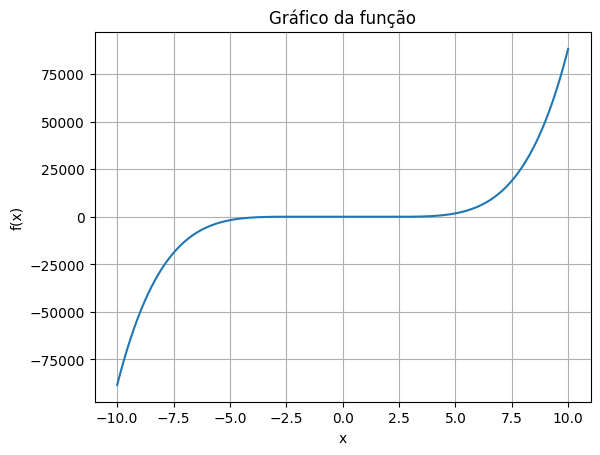

In [ ]:
# Função 1
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x**2 - 4) * (x**3 - 8*x - 1)

x = np.linspace(-10, 10, 400)
y = f(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfico da função')
plt.grid(True)
plt.show()


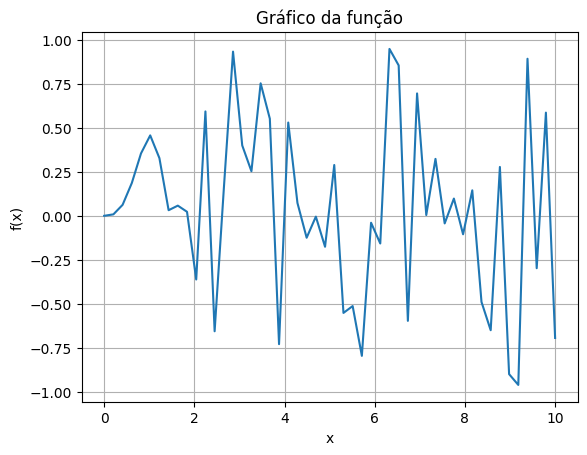

In [ ]:
# Função 2
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10)
y = np.sin(x**3) * np.cos(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfico da função')
plt.grid(True)
plt.show()


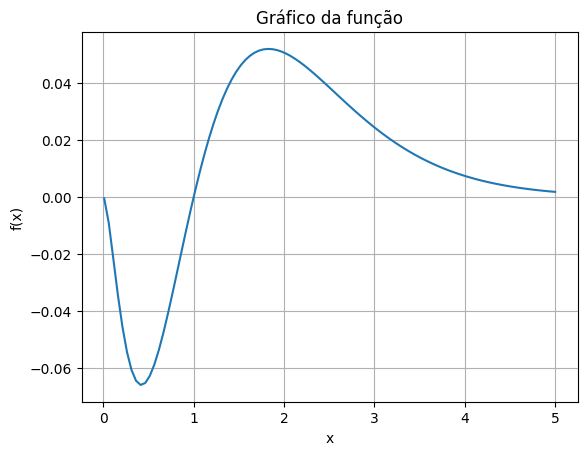

In [ ]:
# Função 3
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0.01, 5, 100)
y = x**2 * np.exp(-2*x) * np.log(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfico da função')
plt.grid(True)
plt.show()



# Questão 2 (vale 2 pontos)
Uma empresa espacial está tentando descobrir o ponto mínimo da órbita de um satélite cuja função orbital é dada por: 
$$f(x)=7\sin(x)-2\cos(x)$$

Encontre o primeiro ponto de mínimo no intervalo $-10<=x<=10$.

Como sempre, você pode usar qualquer ferramenta disponível na internet para lhe auxiliar a resolver este problema. Lembre-se, contudo, que o sympy é uma boa alternativa. 

Em todas as questões você pode usar apenas os métodos, regras, técnicas e algoritmos que utilizamos na nossa disciplina, em sala, ou no material de apoio. Lembrem-se estamos limitados as bibliotecas sympy, numpy e matplotlib.

Para resolver esta questão você precisará de, no minimo, 4 casas decimais de precisão depois da vírgula. 

In [1]:
from sympy import symbols, sin, cos, diff, solve

x = symbols('x')

f = 7*sin(x) - 2*cos(x)
f_prime = diff(f, x)

critical_points = solve(f_prime, x)

min_point = None
for point in critical_points:
    if -10 <= point <= 10:
        if min_point is None or f.subs(x, point) < f.subs(x, min_point):
            min_point = point

min_point_value = f.subs(x, min_point).evalf()

print("O ponto de mínimo da função no intervalo [-10, 10] é")
print("{:.4f}".format(min_point_value))

O ponto de mínimo da função no intervalo [-10, 10] é
-7.2801


# Questão 3 (vale 2 pontos)
Considerando a função $f(x,y) = \sin(xy) + \cos(x+2y)$, no intervalo $0\leq x\leq 5 \space\space e \space\space 0\leq y\leq 5$ trace, usando o plotly o gráfico desta função e marque os pontos de máximo e mínimo neste intevalo.

Lembre-se o sympy é sempre uma opção e você pode usar qualquer técnica, algoritmo, regra, ou tabela, que tenha sido usada na matéria. E que precisa de apenas uma casa decimal de precisão. Uma dica importante para a solução deste problema é a função **np.unravel_index**


In [2]:
import plotly.graph_objs as go
import numpy as np

def f(x,y):
    return np.sin(x*y) + np.cos(x+2*y)

x = np.linspace(0,5,100)
y = np.linspace(0,5,100)

X,Y = np.meshgrid(x,y)

Z = f(X,Y)

max_index = np.unravel_index(np.argmax(Z), Z.shape)
min_index = np.unravel_index(np.argmin(Z), Z.shape)

fig = go.Figure(data=[go.Surface(z=Z,x=X,y=Y)])
fig.add_trace(go.Scatter3d(x=[X[max_index], X[min_index]], y=[Y[max_index], Y[min_index]], z=[Z[max_index], Z[min_index]],
                           mode='markers', marker=dict(size=10,color=['red', 'blue'])))

fig.update_layout(title='Gráfico da função',
                  scene=dict(xaxis_title='x',yaxis_title='y',zaxis_title='f(x,y)'),
                  margin=dict(l=0,r=0,b=0,t=40))

fig.show()
